<a href="https://colab.research.google.com/github/LUCAS-01SANTOS/Notebooks-Colab/blob/main/Data_Viz_Interactive_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Visualizações de Dados com Python**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

Uma coisa muito interessante que podemos trazer para os nossos plots é a interatividade. Em muitos casos, ela pode ser essencial, e pode trazer resultados impressionantes para nosso projeto.

Para isso, utilizaremos a biblioteca [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/).


O framework dos widgets é construído no *Comm Framework* (abreviação para comunicação, em inglês). O *Comm Framework* é um framework que permite que o kernel envie e receba mensagens em JSON do front end.

<center><img src="https://ipywidgets.readthedocs.io/en/latest/_images/WidgetArch.png" height="400px"></center>

A função `interact` (ipywidgets.interact) automaticamente cria uma interface de usuário com controles para explorar o código e os dados interativamente. Esse é o jeito mais fácil de começar widgets do IPython.

No nível mais básico, o `interact` cria automaticamente um interface de usuário que controla os argumentos de uma função, e então chama a função com aqueles argumentos que você selecionou através da UI.

Portanto, para usar o `interact` você precisa definir uma função que queira explorar.

<center><img src="https://ipywidgets.readthedocs.io/en/stable/_images/WidgetModelView.png" height="400px"></center>

Para cada tipo de argumento passado para função, um tipo apropriado de widget é criado para fazer a interação, podendo ser um checkbox, slider, dropdown menu, etc.

Vamos ver como isso funciona na prática.

In [ ]:
# instalando o pacote
!pip install ipywidgets -q

A documentação instrui que o código abaixo seja utilizado para que essas interações estejam disponíveis em Jupyter Notebooks. Entretanto, no Colab isso não é necessário. Caso você vá realizar esse tipo de plot em um Notebook local, utilize a função abaixo, e tome por referência a documentação, em tudo que diferir de lá nesse notebook.

In [ ]:
# jupyter nbextension enable --py widgetsnbextension

Uma vez instalados, precisamos importar os pacotes. Aqui, importaremos algumas funções específicas do pacote, e o pacote inteiro, para facilitar nosso código.

In [ ]:
# importando os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, interact_manual
import ipywidgets as widgets

Abaixo, vamos criar uma função normal. Aqui, podemos ver que ao chamar a função, passamos um parâmetro, que tomará o lugar de x. Podemos alterar esse valor, e rodar a função novamente, modificando o plot.

Mas, com o `ipywidgets` nós conseguimos tornar esse processo mais fácil, por meio de uma UI interativa.

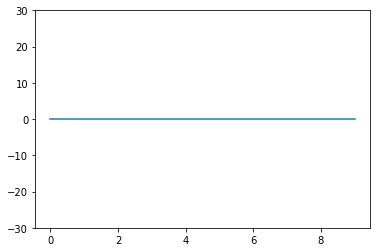

In [ ]:
# criando uma função
def f(x):
  plt.plot(np.arange(0,10), x*np.arange(0,10))
  plt.ylim(-30,30)
f(0)

Para isso, vamos chamar a função que definimos anteriormente dentro da função interact do `ipywidget`.

Vamos passar como argumento a função, e o range de parâmetros que x pode assumir. O primeiro valor será o mínimo, o segundo o máximo, e o terceiro seria nosso step.

Com tudo definido, basta rodar e utilizar o slider criado. A biblioteca usar um slider, pois vê que estamos utilizando um `int`, então, entende que essa seria a melhor UI para o caso.

In [ ]:
# muda o slope, sabendo que é um integer, ele sabe que é slider
def f(x):
  plt.plot(np.arange(0,10), x*np.arange(0,10))
  plt.ylim(-30,30)
interact(f, x=(-5,10,0.5))


interactive(children=(FloatSlider(value=2.0, description='x', max=10.0, min=-5.0, step=0.5), Output()), _dom_c…

<function __main__.f>

Se passarmos um `bool` como parâmetro para x, dentro do interact, ao invés de um slider, teremos um checkbox, onde a caixa preenchida seria True, e não preenchida, False.

In [ ]:
# checkbox para booleanos#
rands = np.random.rand(100)
def f(x):
  if x:
    plt.plot(rands, 'b')
  else:
    plt.plot(rands, 'r')
interact(f, x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

Pordemos também passar um `decorator`, algo que vai servir como decorador para o nosso plot. Nesse caso, queremos modificar o nome do título do plot, por exemplo.

In [ ]:
# decorator. Identifica a string e entrega um text box

@interact(x='Sigmoidal')
def f(x):
  plt.title(x)


interactive(children=(Text(value='Sigmoidal', description='x'), Output()), _dom_classes=('widget-interact',))

Também é importante ressaltar que não estamos presos a apenas um widget por plot. Basta fazer as mudanças na função, e passar os parâmetros no interact.

Aqui mostramos também que ele define um range e um step automaticamente, mas você também pode escolher passar como mostramos nos exemplos anteriores.

In [ ]:
# multiplos widgets
def f(a,b):
  plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), b))
  plt.title("Lei de Potência: $x=ay^b$")
interact(f, a=1, b=3)

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), IntSlider(value=3, description='b', …

<function __main__.f>

Se a personalização é importante, ter valores fixos também pode ser.



In [ ]:
# valores fixos
def f(a,b):
  plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), b))
  plt.title("Lei da Potência: $x=ay^b$")
interact(f, a=1, b=fixed(2))

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.f>

In [ ]:
# valores fixos, mas com o b definido
def f(a):
  plt.plot(np.arange(0,10), a*np.power(np.arange(0,10), 2))
  plt.title("Lei da Potência: $x=ay^b$")
interact(f, a=1)

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), Output()), _dom_classes=('widget-int…

<function __main__.f>

Para criar um menu dropdown para as interações, basta passar uma lista como parâmetro.

Aqui, a nossa função vai receber o parâmetro cor através do interact.

A cor vai fazer parte de uma lista de cores, que vamos passar como parâmetro dentro da função do interact.

In [ ]:
# dropdown de listas

def f(color):
  plt.plot(np.arange(0,10), np.power(np.arange(0,10), 5), c=color)
  plt.title("Lei da Potência: $x=ay^b$")
colors=['Red', 'Blue', 'Green']
interact(f, color=colors)

interactive(children=(Dropdown(description='color', options=('Red', 'Blue', 'Green'), value='Red'), Output()),…

<function __main__.f>

Também é possível criar um dropdown com dicionários. Poderíamos, por exemplo, ter passado uam lista de ints, e modificaríamos o plot a partir de um dropdown, da mesma forma que faríamos com um slider.

Mas e se quiséssimos escrever o nome do número e fazer com que a função receba o número como int? Dicionários!

Passamos as opções do dropdown como chaves e os valores que a função irá receber como valores.

Então é só passar o dicionário como parâmetro dentro do interact.

In [ ]:
# dropdown de dicionários 

def f(b):
  plt.plot(np.arange(0,10), np.power(np.arange(0,10), b))
  plt.title("Power Law: $x=ay^b$")
powers = {'One':1, 'Two':2, 'Three':3}
interact(f, b=powers)

interactive(children=(Dropdown(description='b', options={'One': 1, 'Two': 2, 'Three': 3}, value=1), Output()),…

<function __main__.f>

In [ ]:
# dropdown de listas

def f(color):
  plt.plot(np.arange(0,10), np.power(np.arange(0,10), 5), c=color)
  plt.title("Lei da Potência: $x=ay^b$")
colors={'Vermelho':'Red', 'Azul':'Blue', 'Verde':'Green'}
interact(f, color=colors)

interactive(children=(Dropdown(description='color', options={'Vermelho': 'Red', 'Azul': 'Blue', 'Verde': 'Gree…

<function __main__.f>